<h3>Задача регрессии</h3>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('heart_disease.csv')

df.columns = df.columns.str.strip()
df['sex'] = df['sex'].astype("category")
df['chest pain type'] = df['chest pain type'].astype("category")
df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].astype("category")
df['resting electrocardiographic results'] = df['resting electrocardiographic results'].astype('category')
df['exercise induced angina'] = df['exercise induced angina'].astype('category')
df['slope of peak'] = df['slope of peak'].astype('category')
df['Disease'] = df['Disease'].astype('category')

y = df['maximum heart rate achieved'] # выбираем целевую переменную (количественная)
X = df.drop('maximum heart rate achieved', axis=1) # переменные для проверки влияния

In [31]:
category_columns: list[str] = X.select_dtypes(include=['category']).columns

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)
X

,age,resting blood pressure,serum cholestoral in mg/dl,oldpeak,number of major vessels,thal,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,Disease_1
0,70,130,322,2.4,3,3,True,False,False,True,False,False,True,False,True,False,True
1,67,115,564,1.6,0,7,False,False,True,False,False,False,True,False,True,False,False
2,57,124,261,0.3,0,7,True,True,False,False,False,False,False,False,False,False,True
3,64,128,263,0.2,1,7,True,False,False,True,False,False,False,True,True,False,False
4,74,120,269,0.2,1,3,False,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,0.5,0,7,True,False,True,False,True,False,False,False,False,False,False
266,44,120,263,0.0,0,7,True,True,False,False,False,False,False,False,False,False,False
267,56,140,294,1.3,0,3,False,True,False,False,False,False,True,False,True,False,False
268,57,140,192,0.4,0,6,True,False,False,True,False,False,False,False,True,False,False


In [32]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,age,resting blood pressure,serum cholestoral in mg/dl,oldpeak,number of major vessels,thal,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,Disease_1,y
0,70,130,322,2.4,3,3,True,False,False,True,False,False,True,False,True,False,True,109
1,67,115,564,1.6,0,7,False,False,True,False,False,False,True,False,True,False,False,160
2,57,124,261,0.3,0,7,True,True,False,False,False,False,False,False,False,False,True,141
3,64,128,263,0.2,1,7,True,False,False,True,False,False,False,True,True,False,False,105
4,74,120,269,0.2,1,3,False,True,False,False,False,False,True,True,False,False,False,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,0.5,0,7,True,False,True,False,True,False,False,False,False,False,False,162
266,44,120,263,0.0,0,7,True,True,False,False,False,False,False,False,False,False,False,173
267,56,140,294,1.3,0,3,False,True,False,False,False,False,True,False,True,False,False,153
268,57,140,192,0.4,0,6,True,False,False,True,False,False,False,False,True,False,False,148


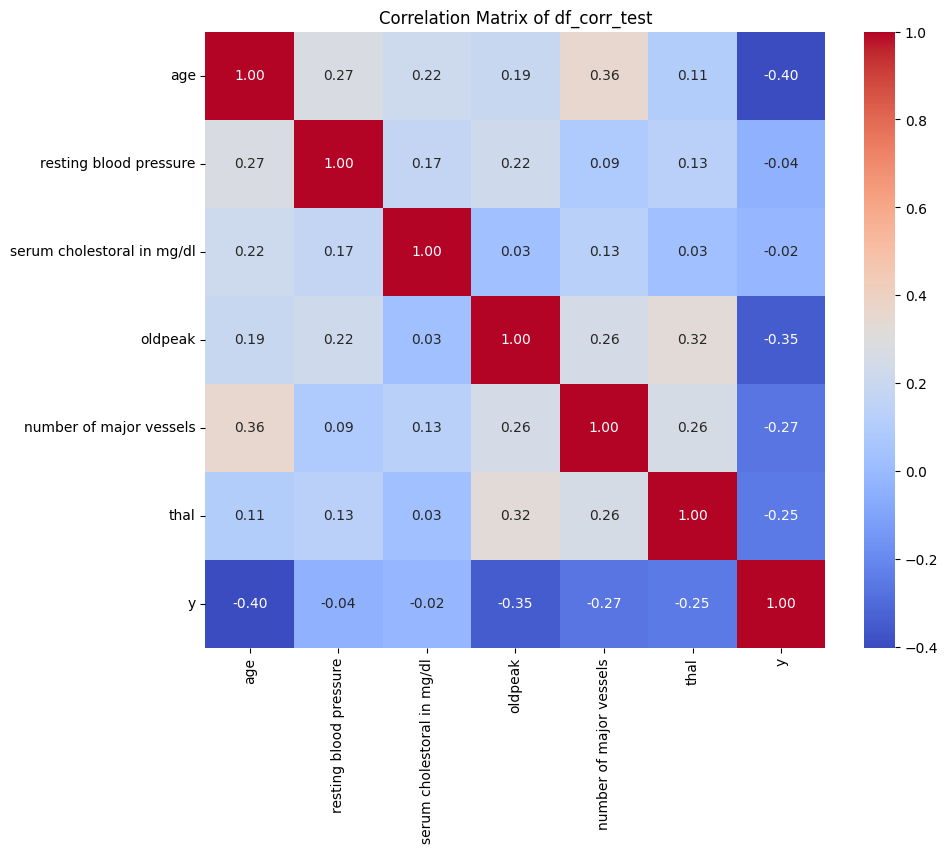

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

Результат с линейной регрессией

In [35]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 16.11
Mean Squared Error (MSE): 399.83
R^2 Score: 0.31


In [36]:
X

,age,resting blood pressure,serum cholestoral in mg/dl,oldpeak,number of major vessels,thal,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,Disease_1
0,70,130,322,2.4,3,3,True,False,False,True,False,False,True,False,True,False,True
1,67,115,564,1.6,0,7,False,False,True,False,False,False,True,False,True,False,False
2,57,124,261,0.3,0,7,True,True,False,False,False,False,False,False,False,False,True
3,64,128,263,0.2,1,7,True,False,False,True,False,False,False,True,True,False,False
4,74,120,269,0.2,1,3,False,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,0.5,0,7,True,False,True,False,True,False,False,False,False,False,False
266,44,120,263,0.0,0,7,True,True,False,False,False,False,False,False,False,False,False
267,56,140,294,1.3,0,3,False,True,False,False,False,False,True,False,True,False,False
268,57,140,192,0.4,0,6,True,False,False,True,False,False,False,False,True,False,False


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     270 non-null    int64  
 1   resting blood pressure                  270 non-null    int64  
 2   serum cholestoral in mg/dl              270 non-null    int64  
 3   oldpeak                                 270 non-null    float64
 4   number of major vessels                 270 non-null    int64  
 5   thal                                    270 non-null    int64  
 6   sex_1                                   270 non-null    bool   
 7   chest pain type_2                       270 non-null    bool   
 8   chest pain type_3                       270 non-null    bool   
 9   chest pain type_4                       270 non-null    bool   
 10  fasting blood sugar > 120 mg/dl_1       270 non-null    bool  

Отбор признаков с помощью кореляции и RFE

In [38]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [40]:
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [41]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 15.94
Mean Squared Error (MSE): 383.69
R^2 Score: 0.34


In [42]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 16.21
Mean Squared Error (MSE): 409.16
R^2 Score: 0.30


<p>Отбор по кореляции хоть и немного, но увеличил R^2</p>

<h4>Визуализация коэффицентов регрессии</h4>

Regularization: None
Mean Absolute Error (MAE): 15.94
Mean Squared Error (MSE): 383.69
R^2 Score: 0.34


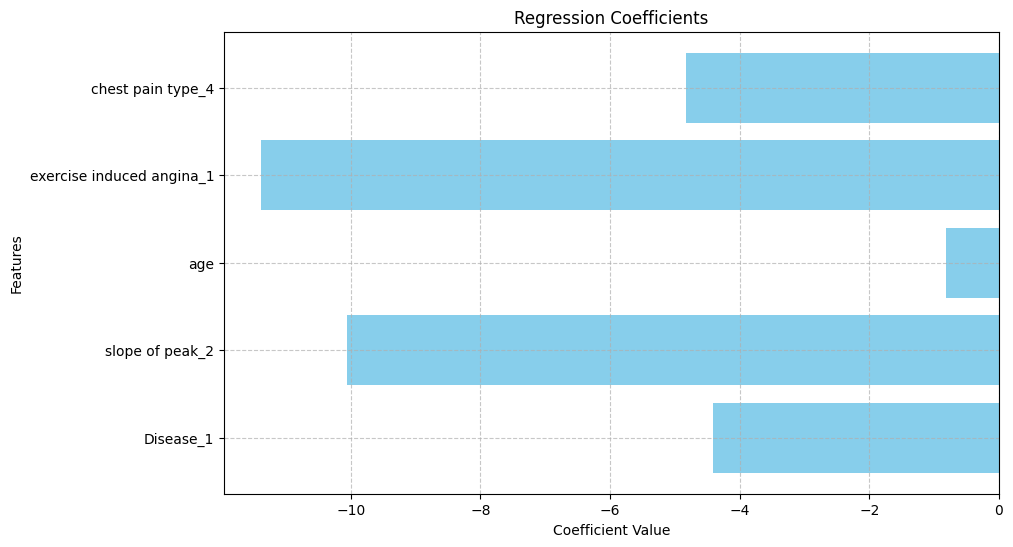

In [43]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_corr, y_selected_corr, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_corr.columns)


In [44]:
numeric_features = X_selected_corr.select_dtypes(include=['int']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_corr[numeric_features] = scaler.fit_transform(X_selected_corr[numeric_features])

C:\Users\User\AppData\Local\Temp\ipykernel_8184\3651342028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_corr[numeric_features] = scaler.fit_transform(X_selected_corr[numeric_features])


In [45]:
X_selected_corr

,Disease_1,slope of peak_2,age,exercise induced angina_1,chest pain type_4
0,True,True,0.854167,False,True
1,False,True,0.791667,False,False
2,True,False,0.583333,False,False
3,False,True,0.729167,True,True
4,False,False,0.937500,True,False
...,...,...,...,...,...
265,False,False,0.479167,False,False
266,False,False,0.312500,False,False
267,False,True,0.562500,False,False
268,False,True,0.583333,False,True


Regularization: None
Mean Absolute Error (MAE): 15.94
Mean Squared Error (MSE): 383.69
R^2 Score: 0.34


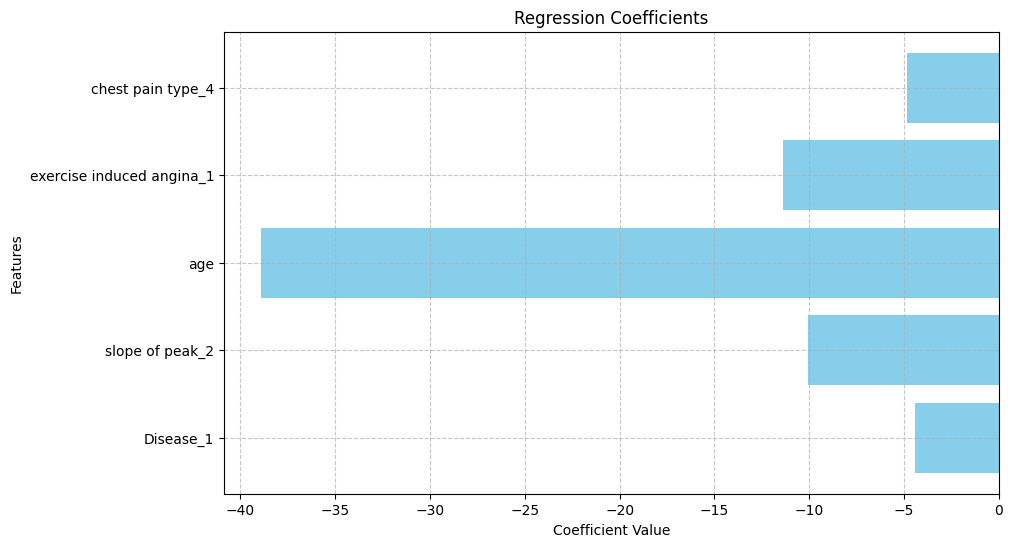

In [46]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_corr, y_selected_corr)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_corr.columns)


In [47]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 15.94
Mean Squared Error (MSE): 383.69
R^2 Score: 0.34


Регуляризация

In [48]:
X

,age,resting blood pressure,serum cholestoral in mg/dl,oldpeak,number of major vessels,thal,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,Disease_1
0,70,130,322,2.4,3,3,True,False,False,True,False,False,True,False,True,False,True
1,67,115,564,1.6,0,7,False,False,True,False,False,False,True,False,True,False,False
2,57,124,261,0.3,0,7,True,True,False,False,False,False,False,False,False,False,True
3,64,128,263,0.2,1,7,True,False,False,True,False,False,False,True,True,False,False
4,74,120,269,0.2,1,3,False,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,0.5,0,7,True,False,True,False,True,False,False,False,False,False,False
266,44,120,263,0.0,0,7,True,True,False,False,False,False,False,False,False,False,False
267,56,140,294,1.3,0,3,False,True,False,False,False,False,True,False,True,False,False
268,57,140,192,0.4,0,6,True,False,False,True,False,False,False,False,True,False,False


Regularization: l1
Mean Absolute Error (MAE): 16.55
Mean Squared Error (MSE): 409.24
R^2 Score: 0.30


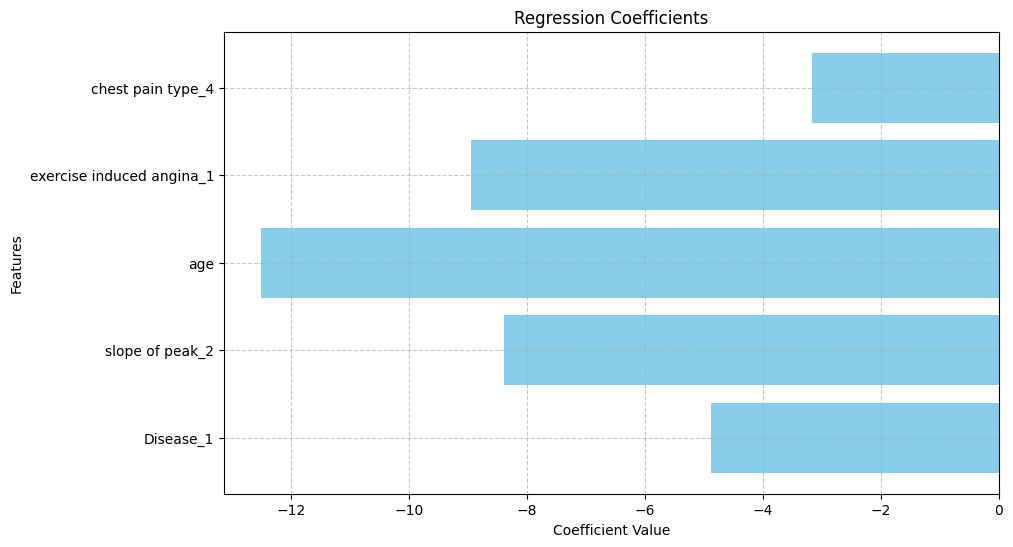

In [49]:
model, _, _, _, _ = resolve_regression(X_selected_corr, y_selected_corr, regularization='l1')
None

plot_regression_coefficients(model, X_selected_corr.columns)


Regularization: l2
Mean Absolute Error (MAE): 15.92
Mean Squared Error (MSE): 381.27
R^2 Score: 0.35


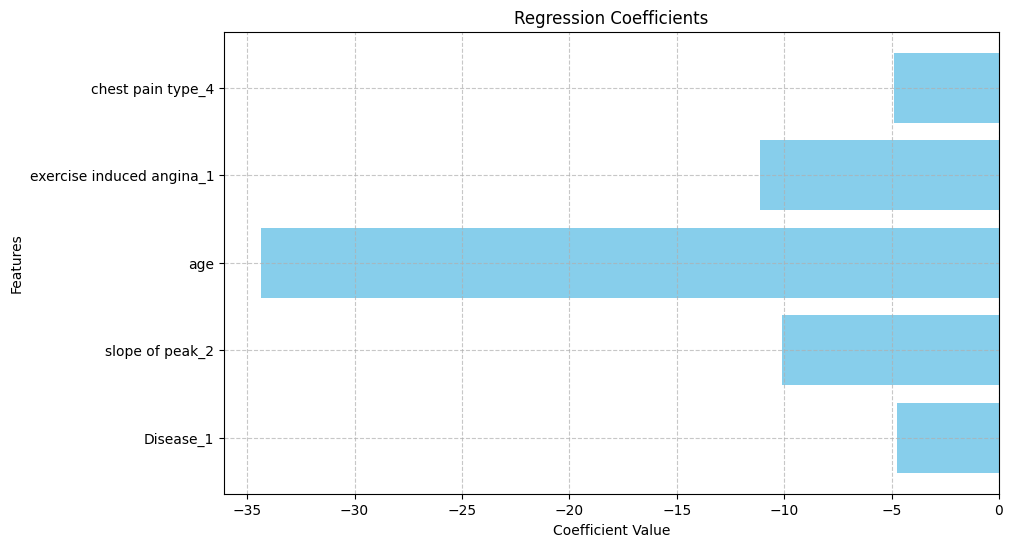

In [50]:
model, _, _, _, _ = resolve_regression(X_selected_corr, y_selected_corr, regularization='l2')
None

plot_regression_coefficients(model, X_selected_corr.columns)

Наилучший результат - отбор по кореляции + ridge

Regularization: None
Mean Absolute Error (MAE): 15.94
Mean Squared Error (MSE): 383.69
R^2 Score: 0.34


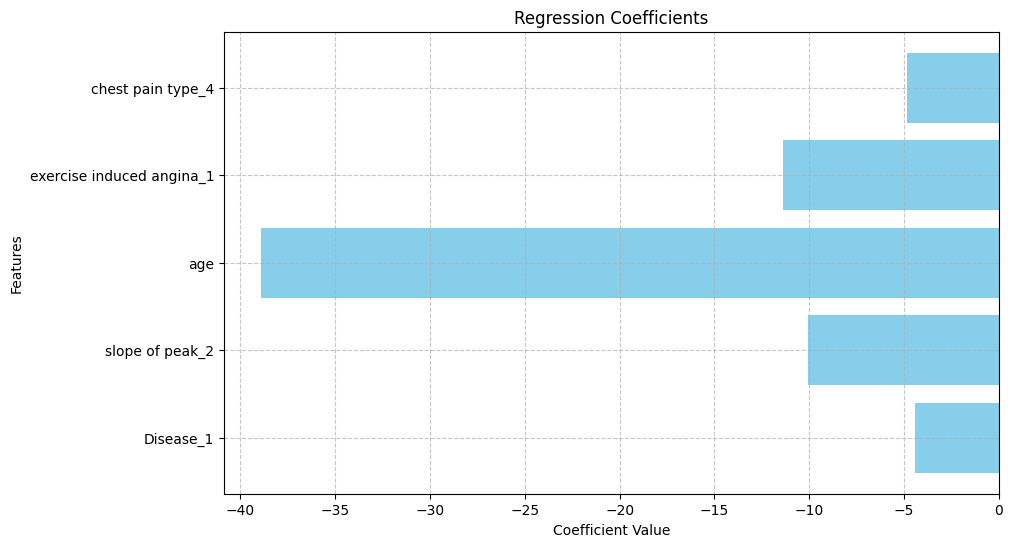

In [51]:
model, _, _, _, _  = resolve_regression(X_selected_corr, y_selected_corr, regularization=None)
None

plot_regression_coefficients(model, X_selected_corr.columns)

KNeighborsRegressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

def kneighbors(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsRegressor(n_neighbors=2) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test


In [53]:
kneighbors(X,y)
None

Mean Absolute Error (MAE): 18.63
Mean Squared Error (MSE): 489.87
R^2 Score: 0.16


In [54]:
kneighbors(X_selected_corr, y_selected_corr)
None

Mean Absolute Error (MAE): 16.85
Mean Squared Error (MSE): 424.47
R^2 Score: 0.27


In [55]:
kneighbors(X_selected_rfe, y_selected_rfe)
None

Mean Absolute Error (MAE): 16.44
Mean Squared Error (MSE): 460.00
R^2 Score: 0.21


DecisionTreeRegressor

In [56]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

def decitiontree(X, y, fig_width, fig_height):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeRegressor(random_state=42, max_depth=5) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    plt.figure(figsize=(fig_width, fig_height))
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
    plt.show()

    return model, X_train, X_test, y_train, y_test

Mean Absolute Error (MAE): 18.48
Mean Squared Error (MSE): 516.13
R^2 Score: 0.11


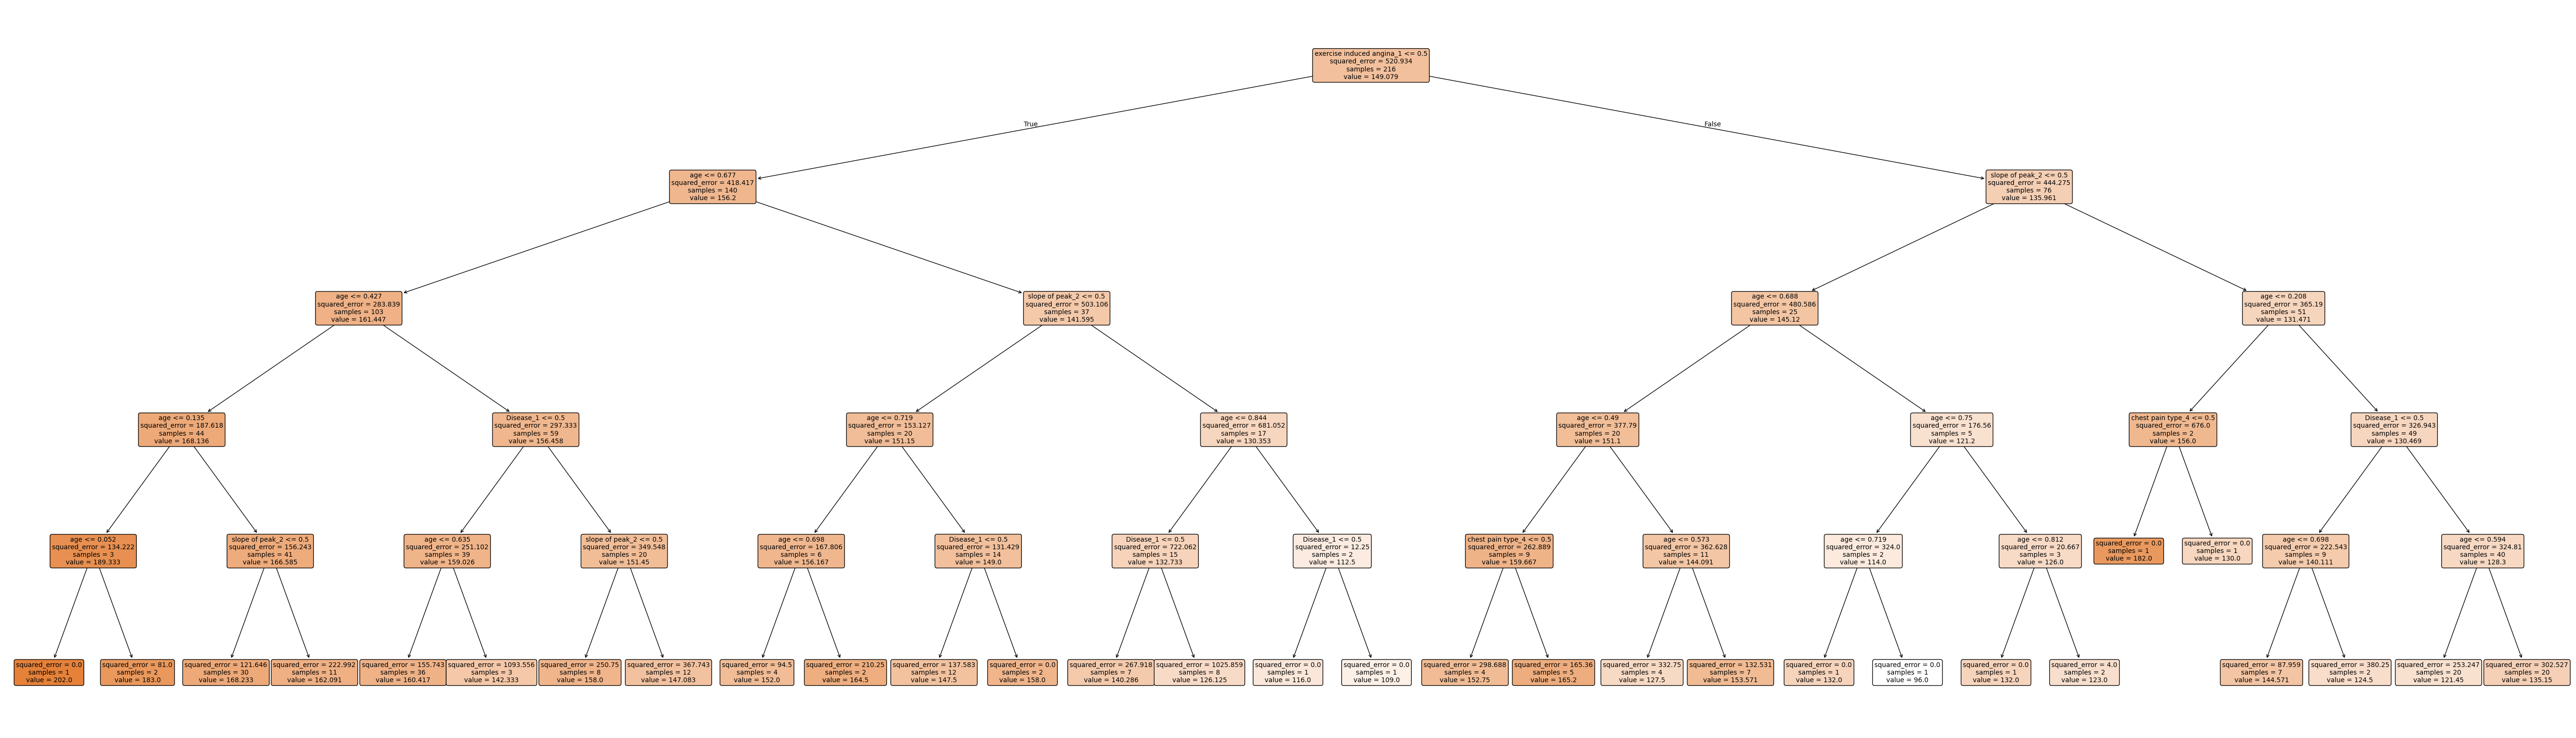

In [57]:
import matplotlib.pyplot as plt

decitiontree(X_selected_corr, y_selected_corr, 70, 20)
None

Mean Absolute Error (MAE): 17.09
Mean Squared Error (MSE): 433.80
R^2 Score: 0.26


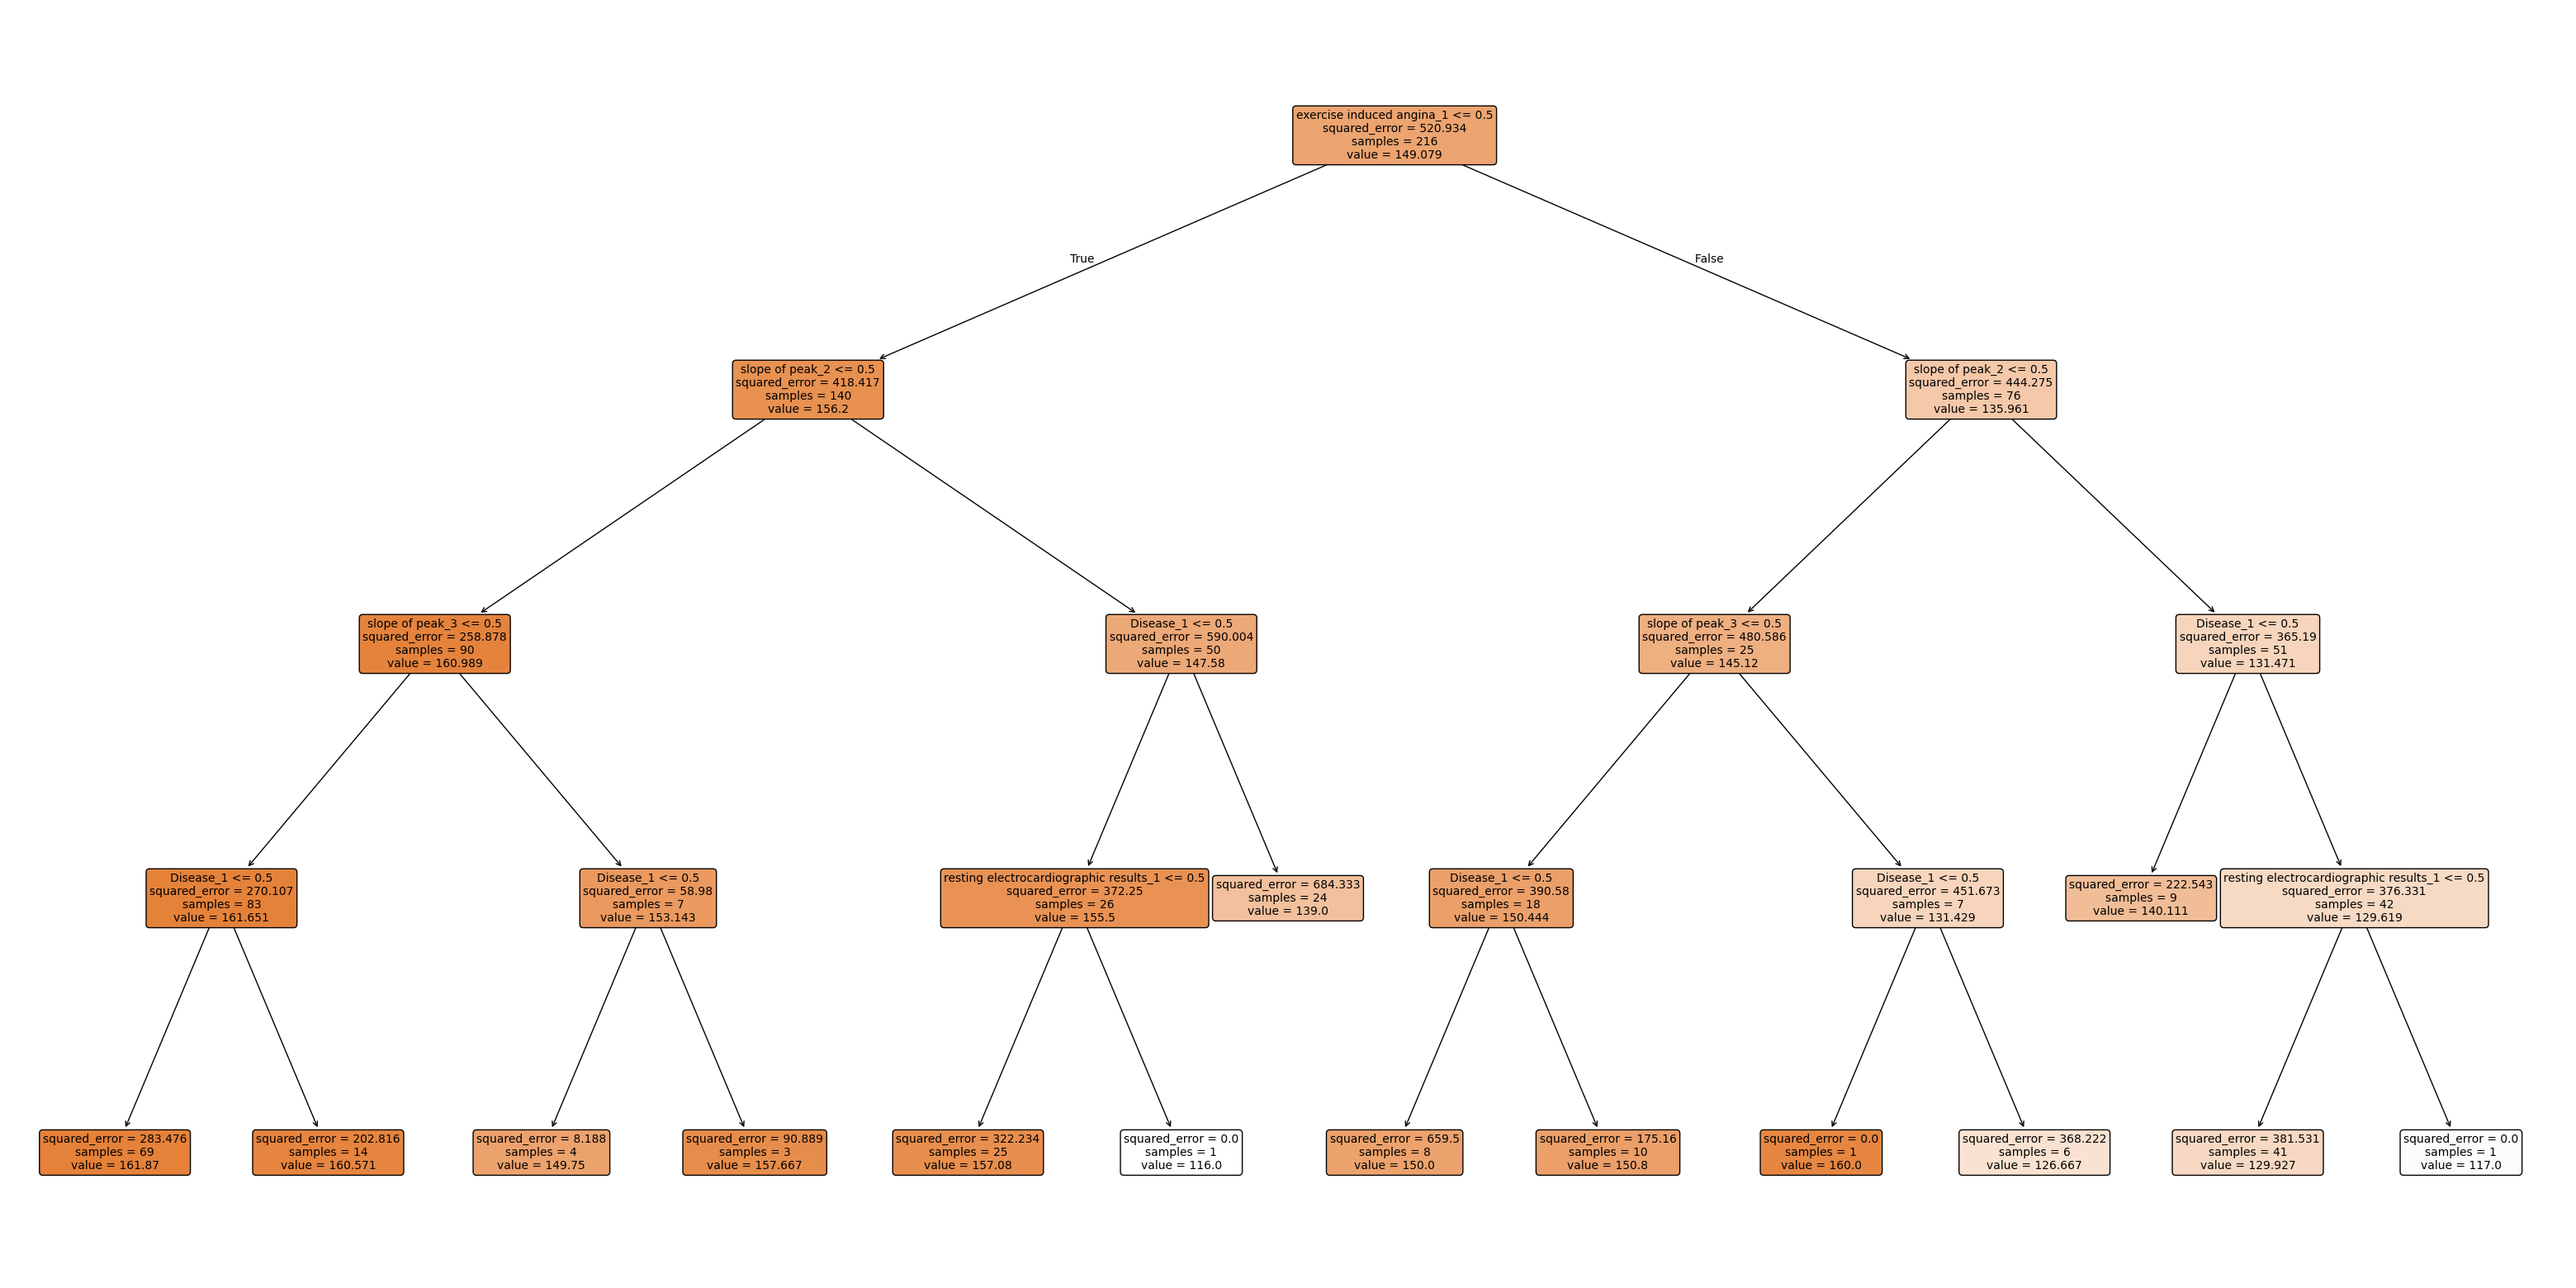

In [58]:
decitiontree(X_selected_rfe, y_selected_rfe, 40, 20)
None